## Linear Regression: First, get your data

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


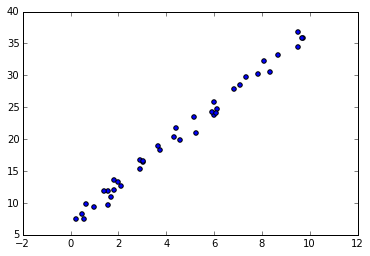

In [1]:
import numpy as np
import pandas as pd

gen = np.random.RandomState(42)
num_samples = 40

x = 10 * gen.rand(num_samples)
y = 3 * x + 7+ gen.randn(num_samples)
X = pd.DataFrame(x)

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,y)


## Linear Regression: Fit model to data

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print('Slope: {}, Intercept: {}'.format(model.coef_, model.intercept_))


Slope: [ 3.0133901], Intercept: 6.86049099805


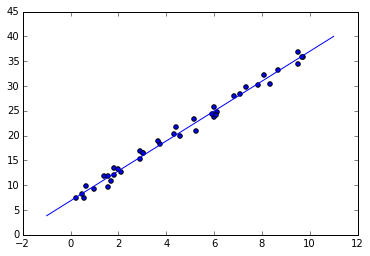

In [4]:
Xtest = pd.DataFrame(np.linspace(-1, 11))
predicted = model.predict(Xtest)

plt.scatter(x, y)
plt.plot(Xtest, predicted)


## Iris data set

In [5]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target


In [6]:
ntest=10
np.random.seed(0)
indices = np.random.permutation(len(X))

iris_X_train = X[indices[:-ntest]]
iris_Y_train = Y[indices[:-ntest]]

iris_X_test = X[indices[-ntest:]]
iris_Y_test = Y[indices[-ntest:]]


In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(iris_X_train, iris_Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
predicted_classes = knn.predict(iris_X_test)

print('kNN predicted classes: {}'.format(predicted_classes))
print('Real classes:          {}'.format(iris_Y_test))


kNN predicted classes: [1 2 1 0 0 0 2 1 2 0]
Real classes:          [1 1 1 0 0 0 2 1 2 0]


## Clustering data 

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target
print("Xs: {}".format(X))


Xs: [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.  

## Fit data

In [10]:
from sklearn import cluster

k_means = cluster.KMeans(3)
k_means.fit(iris.data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Checking the model

In [11]:
print("Generated labels: \n{}".format(k_means.labels_))
print("Real labels: \n{}".format(Y))


Generated labels: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Real labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
from sklearn import metrics
print(metrics.classification_report(iris_Y_test, predicted_classes))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      0.75      0.86         4
          2       0.67      1.00      0.80         2

avg / total       0.93      0.90      0.90        10

